In [1]:
!pip install neattext

In [2]:
!pip install wordcloud

In [3]:
!pip install gensim

In [33]:
import pandas as pd
import neattext.functions as nfx
import matplotlib.pyplot as plt

In [34]:
df= pd.read_csv('processed_tweet_data.csv')
df.head(5)

created_at  \
0  Fri Apr 22 22:20:18 +0000 2022   
1  Fri Apr 22 22:19:16 +0000 2022   
2  Fri Apr 22 22:17:28 +0000 2022   
3  Fri Apr 22 22:17:20 +0000 2022   
4  Fri Apr 22 22:13:15 +0000 2022   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  polarity  subjectivity  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...       0.0           0.0   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...       0.0           0.0   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...       0.0           0.0   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...       0.0           0.0   
4  RT @RolandTichy: Baerbock verkündet mal so neb...       0.0           0.0   

  lang  favorite_count  retweet_count original_author  followers_count  \
0   de            2356            355    McMc74078966                3   
1   de            1985            505    McMc74078966                3   
2   de              16              4    McMc74078966                3   
3   de            1242            332    McMc74078966                3   
4   de            1329            386    McMc74078966                3   

   friends_count possibly_sensitive  \
0             12                NaN   
1             12                NaN   
2             12                NaN   
3             12                NaN   
4             12                NaN   

                                            hashtags       user_mentions place  
0                                                 []      nikitheblogger   NaN  
1                                                 []            sagt_mit   NaN  
2                                                 []  Kryptonoun, WRi007   NaN  
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...              WRi007   NaN  
4                                                 []         RolandTichy   NaN

# task1. cleaning

In [35]:
class CleanTweets:
        
    def drop_unwanted_column(df):
        
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(df:pd.DataFrame):
        
        df = df.drop_duplicates().drop_duplicates(subset='original_text')
        
        return df
    def convert_to_datetime(df:pd.DataFrame):
        """
        convert column to datetime
        """
        df['created_at'] = pd.to_datetime(df['created_at'], errors='ignore')
        
        df = df[df['created_at'] >= '2020-12-31' ]
        
        return df
    
    def convert_to_numbers(df):
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        df['polarity'] = pd.to_numeric(df['polarity'], errors='ignore')
        df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='ignore')
        df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='ignore')
        
        return df
    
    def remove_non_english_tweets(df):
        df = df.query("lang == 'en' ")
        
        return df
   

In [36]:
#pd.to_datetime(df.created_at[0], errors='ignore')

In [37]:
df = CleanTweets.drop_unwanted_column(df)

In [38]:
df= CleanTweets.drop_duplicate(df)

In [39]:
df= CleanTweets.convert_to_datetime(df)

In [40]:
df= CleanTweets. convert_to_numbers(df)

In [41]:
df= CleanTweets.remove_non_english_tweets(df)

In [42]:
# those that have alot of retweets
more_retweets= df.groupby('retweet_count').sum()
more_retweets

polarity  subjectivity  favorite_count  followers_count  \
retweet_count                                                              
0              715.192653   2520.152166               0        733546796   
1               60.100231    208.441798            2415          9069637   
2               46.251738    147.542943            3427         14043593   
3               35.737341     90.767390            3502         19373554   
4               22.517519     73.847055            3000          3384004   
...                   ...           ...             ...              ...   
122175           0.000000      0.000000         1339072             1391   
122631          -0.166667      0.433333          662693              730   
123710           0.000000      0.000000          523454              786   
163328           0.178571      0.267857          102180               10   
434378           0.250000      0.300000         1336988              323   

               friends_count  
retweet_count                 
0                    9574217  
1                    1294666  
2                    1062628  
3                     792549  
4                     467127  
...                      ...  
122175                  1001  
122631                  1072  
123710                   623  
163328                    52  
434378                  1115  

[1641 rows x 5 columns]

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  d = d.astype('datetime64[us]')
C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\matplotlib\dates.py:447: DeprecationWarning: parsing timezone aware datetimes is depr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ConversionError: Failed to convert value(s) to axis units:                      created_at  \
38    2022-04-22 22:17:05+00:00   
39    2022-04-22 13:44:53+00:00   
41    2022-04-22 06:10:34+00:00   
42    2022-04-21 17:22:09+00:00   
43    2022-04-21 10:32:26+00:00   
...                         ...   
24573 2022-04-22 21:31:18+00:00   
24586 2022-04-22 15:22:29+00:00   
24596 2022-04-22 15:01:27+00:00   
24599 2022-04-22 14:58:12+00:00   
24622 2022-04-22 14:44:35+00:00   

                                                  source  \
38     <a href="http://twitter.com/download/android" ...   
39     <a href="http://twitter.com/download/android" ...   
41     <a href="http://twitter.com/download/android" ...   
42     <a href="http://twitter.com/download/android" ...   
43     <a href="http://twitter.com/download/android" ...   
...                                                  ...   
24573  <a href="http://twitter.com/download/android" ...   
24586  <a href="http://twitter.com/download/iphone" r...   
24596  <a href="http://twitter.com/download/iphone" r...   
24599  <a href="http://twitter.com/download/iphone" r...   
24622  <a href="http://twitter.com/download/iphone" r...   

                                           original_text  polarity  \
38     RT @NorthstarCharts: The 10-year yield is tell...      0.16   
39     RT @MichaelAArouet: German 10y mortgage rate w...      0.15   
41           RT @goldseek: When? https://t.co/kO2FfHKaZg      0.00   
42     RT @charliebilello: The 30-year mortgage rate ...      0.00   
43     RT @biancoresearch: Rates rise until something...     -0.40   
...                                                  ...       ...   
24573  RT @Salt_Project_OS: Free yourself from writin...      0.40   
24586  RT @pbhushan1: Thank you @BajpayeeManoj for th...      0.85   
24596  RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...      0.00   
24599  RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...     -0.30   
24622  RT @Parthtiwari25: Gujarat Congress MLA arrest...      0.00   

       subjectivity lang  favorite_count  retweet_count  original_author  \
38         0.540000   en             188             43  davideiacovozzi   
39         0.175000   en             179             32  davideiacovozzi   
41         0.000000   en             193             26  davideiacovozzi   
42         0.183333   en             620            213  davideiacovozzi   
43         0.400000   en            1787            417  davideiacovozzi   
...             ...  ...             ...            ...              ...   
24573      0.800000   en              46              3       RosieG1029   
24586      1.000000   en           14671           5006    kitukalesatya   
24596      0.000000   en            5056            973    kitukalesatya   
24599      0.600000   en             636            115    kitukalesatya   
24622      0.000000   en            1025            203    kitukalesatya   

       followers_count  friends_count possibly_sensitive  \
38                  18             55                NaN   
39                  18             55                NaN   
41                  18             55              False   
42                  18             55                NaN   
43                  18             55              False   
...                ...            ...                ...   
24573              148           1240                NaN   
24586              706            643                NaN   
24596              706            643              False   
24599              706            643              False   
24622              706            643                NaN   

                                                hashtags  \
38     [{'text': 'gold', 'indices': [116, 121]}, {'te...   
39                                                    []   
41                                                    []   
42                                                    []   
43                                                    []   
...                                                  ...   
24573                                                 []   
24586                                                 []   
24596                                                 []   
24599                                                 []   
24622                                                 []   

                  user_mentions place  
38              NorthstarCharts   NaN  
39               MichaelAArouet   NaN  
41                     goldseek   NaN  
42               charliebilello   NaN  
43               biancoresearch   NaN  
...                         ...   ...  
24573           Salt_Project_OS   NaN  
24586  pbhushan1, BajpayeeManoj   NaN  
24596            s_shreyatweets   NaN  
24599                   tejjINC   NaN  
24622             Parthtiwari25   NaN  

[15082 rows x 15 columns]

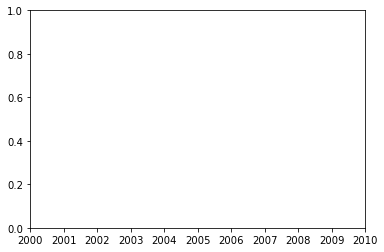

In [46]:

plt.bar(df, df['retweet_count'] )

plt.ylabel('df')
plt.xlabel('retweet_count')
plt.show()

In [ ]:
df.info()

In [15]:
# changing text from object type to string
df['original_text'] = df['original_text'].astype('str')

In [16]:

df['original_text'] = df['original_text'].apply(nfx.remove_hashtags)

<AxesSubplot:>

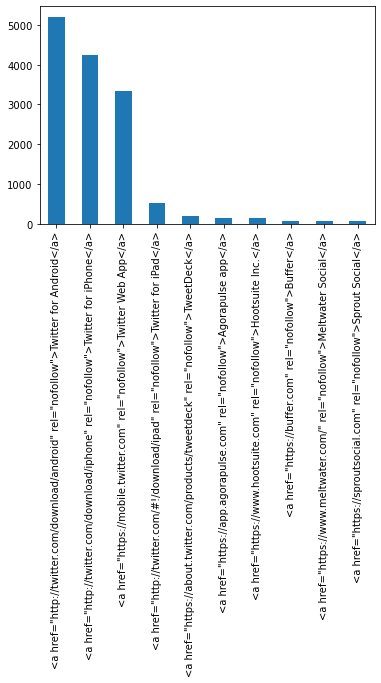

In [28]:
df['source'].value_counts()[:10].plot(kind='bar')


In [17]:
# imports for sentiment analysis
import os
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import os
import re

In [18]:
class PrepareData:
    def __init__(self,df):
        self.df = df
  

    def preprocess_data(self):
        tweets_df = self.df.loc[df['lang']=='en']

        # text preprocessing
        tweets_df['original_text']=tweets_df['original_text'].astype(str)
        tweets_df['original_text'] = tweets_df['original_text'].apply(lambda x: x.lower())
        tweets_df['original_text']= tweets_df['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

        #Converting tweets to list of words For feature engineering
        list_of_sentenses = [tweet for tweet in tweets_df['original_text']]
        list_of_words = [sent.split() for sent in list_of_sentenses]

        #Create dictionary which contains Id and word 
        word_to_id = corpora.Dictionary(list_of_words)
        corp_1= [word_to_id.doc2bow(tweet) for tweet in list_of_words]




        return list_of_words, word_to_id, corp_1


In [19]:
PrepareData_obj=PrepareData(df)
list_of_words ,id2word,corp=PrepareData_obj.preprocess_data()

In [20]:
print(corp)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1)], [(7, 1), (9, 1), (14, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(9, 1), (38, 1), (39, 1), (40, 1)], [(4, 1), (7, 1), (9, 1), (14, 2), (16, 1), (30, 1), (31, 1), (34, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(5, 1), (9, 1), (10, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(9, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(8, 1), (9, 1), (14, 1), (23, 1), (34, 1), (65, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1),

In [21]:
# Build LDA model
model = gensim.models.ldamodel.LdaModel(corp,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
pprint(model.show_topics(formatted=False))

[(0,
  [('rt', 0.056253813),
   ('to', 0.048234303),
   ('the', 0.032908026),
   ('a', 0.030019633),
   ('and', 0.025760453),
   ('is', 0.025089234),
   ('for', 0.023793984),
   ('on', 0.019487847),
   ('you', 0.012055888),
   ('are', 0.010808715)]),
 (1,
  [('our', 0.022557111),
   ('10', 0.017011577),
   ('my', 0.014955706),
   ('so', 0.014095285),
   ('over', 0.0139323),
   ('or', 0.01006024),
   ('down', 0.0076537314),
   ('tomorrow', 0.0074769007),
   ('had', 0.0073797163),
   ('many', 0.0070016673)]),
 (2,
  [('of', 0.064604566),
   ('the', 0.0644258),
   ('in', 0.042260144),
   ('from', 0.013655312),
   ('has', 0.012136537),
   ('amp', 0.010855116),
   ('follow', 0.010827715),
   ('india', 0.00875097),
   ('read', 0.006124349),
   ('he', 0.0060509522)]),
 (3,
  [('was', 0.028091677),
   ('out', 0.023990871),
   ('her', 0.017249357),
   ('go', 0.014037994),
   ('online', 0.012171163),
   ('levels', 0.009398902),
   ('army', 0.009070626),
   ('police', 0.008419305),
   ('while', 0

In [23]:
print('\nPerplexity: ', model.log_perplexity(corp))  
doc_lda = model[corp]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model, texts=list_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -9.320906685351433

 Ldamodel Coherence Score/Accuracy on Tweets:  0.3722903994837675


In [24]:
!pip install pyLDAvis 

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached future-0.18.2-py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [27]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(model, corp, id2word)
LDAvis_prepared

C:\Users\USER\anaconda3\envs\BSC\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.318147  0.099864       1        1  52.334415
2     -0.037506 -0.278856       2        1  26.464424
1      0.118566  0.060115       3        1   7.897468
3      0.124453  0.067313       4        1   7.664300
4      0.112634  0.051564       5        1   5.639393, topic_info=       Term         Freq        Total Category  logprob  loglift
7        of  4272.000000  4272.000000  Default  30.0000  30.0000
9        rt  7199.000000  7199.000000  Default  29.0000  29.0000
34       to  6163.000000  6163.000000  Default  28.0000  28.0000
14      the  8367.000000  8367.000000  Default  27.0000  27.0000
4        in  3986.000000  3986.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1925   done    46.281153    47.034812   Topic5  -5.6953   2.8592
956   start    46.461972    47.222480   Topic5  -5.6914   2.8592
98      him    45.713667    46.464710   Topic5  -5.7077   2.8591
988     key    46.550639    47.351529   Topic5  -5.6895   2.8583
862    hits    54.766511    56.416203   Topic5  -5.5270   2.8457

[195 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
308       3  0.997586     10
1299      2  0.996732    100
3071      5  0.983302     15
1817      2  0.993701      2
1096      2  0.996808   2022
...     ...       ...    ...
134       2  0.997857  world
57        3  0.997389   year
66        5  0.979209    yet
36        1  0.999368    you
586       1  0.998138   your

[176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')